# Churn Prediction

In [30]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter
from imblearn.over_sampling import SMOTE, ADASYN

from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, RandomizedSearchCV, GridSearchCV

import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve, f1_score

from sklearn.decomposition import PCA

from scipy.stats import skew, skewtest

%matplotlib inline
RANDOM_STATE = 42

In [31]:
# change the scientific numbers to normal
pd.set_option(
    'display.float_format',
     lambda x: '%.2f' % x)

In [32]:
pd.set_option('display.max_columns', 2000)
pd.set_option('display.max_rows', 150)

## Importing and going through the dataset

In [33]:
dataset = pd.read_csv(r'C:\Users\пк\Desktop\thesis-churn-prediction\modified_dataset.csv')

In [34]:
dataset.head()

,ARPU_01,TOTAL_RV_01,TOTAL_TR_01,ONNET_TR_01,OFFNET_TR_01,PSTN_TR_01,DATA_TR_01,ILD_TR_01,ONNET_RV_01,OFFNET_RV_01,PSTN_RV_01,DATA_RV_01,ILD_RV_01,dataUser_01,dataBins_01,SVM_01,ARPU_02,TOTAL_RV_02,TOTAL_TR_02,ONNET_TR_02,OFFNET_TR_02,PSTN_TR_02,DATA_TR_02,ILD_TR_02,ONNET_RV_02,OFFNET_RV_02,PSTN_RV_02,DATA_RV_02,ILD_RV_02,dataUser_02,dataBins_02,SVM_02,ARPU_03,TOTAL_RV_03,TOTAL_TR_03,ONNET_TR_03,OFFNET_TR_03,PSTN_TR_03,DATA_TR_03,ILD_TR_03,ONNET_RV_03,OFFNET_RV_03,PSTN_RV_03,DATA_RV_03,ILD_RV_03,dataUser_03,dataBins_03,SVM_03,ARPU_04,TOTAL_RV_04,TOTAL_TR_04,ONNET_TR_04,OFFNET_TR_04,PSTN_TR_04,DATA_TR_04,ILD_TR_04,ONNET_RV_04,OFFNET_RV_04,PSTN_RV_04,DATA_RV_04,ILD_RV_04,dataUser_04,dataBins_04,SVM_04,ARPU_05,TOTAL_RV_05,TOTAL_TR_05,ONNET_TR_05,OFFNET_TR_05,PSTN_TR_05,DATA_TR_05,ILD_TR_05,ONNET_RV_05,OFFNET_RV_05,PSTN_RV_05,DATA_RV_05,ILD_RV_05,dataUser_05,dataBins_05,SVM_05,ARPU_06,TOTAL_RV_06,TOTAL_TR_06,ONNET_TR_06,OFFNET_TR_06,PSTN_TR_06,DATA_TR_06,ILD_TR_06,ONNET_RV_06,OFFNET_RV_06,PSTN_RV_06,DATA_RV_06,ILD_RV_06,dataUser_06,dataBins_06,SVM_06,CHURN
0,0.00,5.44,0.00,0.00,0.00,0.00,91.69,0.00,0.00,0.00,0.00,5.15,0.00,1,2,3,0.00,5.44,0.00,0.00,0.00,0.00,100.27,0.00,0.00,0.00,0.00,5.15,0.00,1,2,3,0.00,5.44,0.00,0.00,0.00,0.00,111.65,0.00,0.00,0.00,0.00,5.15,0.00,1,2,3,0.00,5.44,0.00,0.00,0.00,0.00,76.70,0.00,0.00,0.00,0.00,5.15,0.00,1,2,3,0.00,5.15,0.00,0.00,0.00,0.00,87.12,0.00,0.00,0.00,0.00,5.15,0.00,1,2,3,0.00,5.15,0.00,0.00,0.00,0.00,108.15,0.00,0.00,0.00,0.00,5.15,0.00,1,2,3,0
1,0.00,24.99,1202.93,532.18,669.74,1.01,5480.39,0.00,1.96,8.58,0.00,13.48,0.00,1,6,5,0.00,15.91,850.41,675.10,175.31,0.00,1200.71,0.00,0.02,0.12,0.00,8.34,0.00,1,3,4,0.00,7.83,281.01,163.92,117.09,0.00,458.19,0.00,0.00,0.00,0.00,3.76,0.00,1,3,3,0.00,10.76,0.35,0.35,0.00,0.00,81.72,0.00,0.00,0.00,0.00,10.02,0.00,1,2,4,0.00,7.35,238.25,235.77,2.48,0.00,22.74,0.00,0.24,0.12,0.00,2.54,0.00,1,2,3,0.00,6.83,69.16,43.73,11.65,13.78,0.07,0.00,0.00,0.57,0.68,0.00,0.00,1,2,3,0
2,0.00,3.64,451.47,451.47,0.00,0.00,0.00,0.00,2.52,0.00,0.00,0.45,0.00,0,1,3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,1,1,0.00,9.76,1270.86,1218.67,52.19,0.00,0.20,0.00,5.75,2.45,0.00,0.89,0.00,1,2,4,0.00,6.53,440.86,428.18,3.78,0.00,0.00,8.91,2.52,0.22,0.00,0.45,2.67,0,1,3,0.00,4.01,935.53,935.53,0.00,0.00,0.00,0.00,3.11,0.00,0.00,0.53,0.00,0,1,3,0.00,9.58,457.51,447.62,9.89,0.00,5.12,0.00,6.94,0.59,0.00,1.23,0.00,1,2,4,0
3,0.00,18.19,564.44,462.34,102.10,0.00,536.93,0.00,4.88,5.49,0.00,6.40,0.00,1,3,4,0.00,14.41,465.57,411.60,53.98,0.00,431.83,0.00,5.51,2.90,0.00,4.59,0.00,1,3,4,0.00,26.28,817.25,721.35,95.90,0.00,1139.31,0.00,5.18,4.97,0.00,14.27,0.00,1,3,5,0.00,10.98,299.17,247.30,51.87,0.00,554.18,0.00,0.00,2.52,0.00,7.04,0.00,1,3,4,0.00,9.28,338.85,266.10,72.75,0.00,169.61,0.00,4.73,3.34,0.00,0.84,0.00,1,2,4,0.00,10.58,147.62,147.25,0.37,0.00,405.56,0.00,4.73,0.07,0.00,5.40,0.00,1,3,4,0
4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,1,1,0.00,6.39,777.58,777.49,0.09,0.00,12.69,0.00,5.05,0.15,0.00,0.89,0.00,1,2,3,0.00,7.96,1187.91,1182.60,5.31,0.00,0.80,0.00,6.13,0.37,0.00,0.89,0.00,1,2,3,0.00,6.53,1610.11,1607.17,2.94,0.00,25.10,0.00,5.05,0.30,0.00,0.89,0.00,1,2,3,0.00,9.47,867.22,864.63,0.23,2.36,39.58,0.00,7.73,0.15,0.15,1.36,0.00,1,2,4,0.00,8.32,509.82,508.27,1.56,0.00,0.00,0.00,6.94,0.15,0.00,1.23,0.00,0,1,3,0


In [35]:
dataset.describe()

,ARPU_01,TOTAL_RV_01,TOTAL_TR_01,ONNET_TR_01,OFFNET_TR_01,PSTN_TR_01,DATA_TR_01,ILD_TR_01,ONNET_RV_01,OFFNET_RV_01,PSTN_RV_01,DATA_RV_01,ILD_RV_01,dataUser_01,dataBins_01,SVM_01,ARPU_02,TOTAL_RV_02,TOTAL_TR_02,ONNET_TR_02,OFFNET_TR_02,PSTN_TR_02,DATA_TR_02,ILD_TR_02,ONNET_RV_02,OFFNET_RV_02,PSTN_RV_02,DATA_RV_02,ILD_RV_02,dataUser_02,dataBins_02,SVM_02,ARPU_03,TOTAL_RV_03,TOTAL_TR_03,ONNET_TR_03,OFFNET_TR_03,PSTN_TR_03,DATA_TR_03,ILD_TR_03,ONNET_RV_03,OFFNET_RV_03,PSTN_RV_03,DATA_RV_03,ILD_RV_03,dataUser_03,dataBins_03,SVM_03,ARPU_04,TOTAL_RV_04,TOTAL_TR_04,ONNET_TR_04,OFFNET_TR_04,PSTN_TR_04,DATA_TR_04,ILD_TR_04,ONNET_RV_04,OFFNET_RV_04,PSTN_RV_04,DATA_RV_04,ILD_RV_04,dataUser_04,dataBins_04,SVM_04,ARPU_05,TOTAL_RV_05,TOTAL_TR_05,ONNET_TR_05,OFFNET_TR_05,PSTN_TR_05,DATA_TR_05,ILD_TR_05,ONNET_RV_05,OFFNET_RV_05,PSTN_RV_05,DATA_RV_05,ILD_RV_05,dataUser_05,dataBins_05,SVM_05,ARPU_06,TOTAL_RV_06,TOTAL_TR_06,ONNET_TR_06,OFFNET_TR_06,PSTN_TR_06,DATA_TR_06,ILD_TR_06,ONNET_RV_06,OFFNET_RV_06,PSTN_RV_06,DATA_RV_06,ILD_RV_06,dataUser_06,dataBins_06,SVM_06,CHURN
count,1925044.00,1925044.00,1925044.00,1925044.00,1925044.00,1925044.00,1925044.00,1925044.00,1925044.00,1925044.00,1925044.00,1925044.00,1925044.00,1925044.00,1925044.00,1925044.00,1925044.00,1925044.00,1925044.00,1925044.00,1925044.00,1925044.00,1925044.00,1925044.00,1925044.00,1925044.00,1925044.00,1925044.00,1925044.00,1925044.00,1925044.00,1925044.00,1925044.00,1925044.00,1925044.00,1925044.00,1925044.00,1925044.00,1925044.00,1925044.00,1925044.00,1925044.00,1925044.00,1925044.00,1925044.00,1925044.00,1925044.00,1925044.00,1925044.00,1925044.00,1925044.00,1925044.00,1925044.00,1925044.00,1925044.00,1925044.00,1925044.00,1925044.00,1925044.00,1925044.00,1925044.00,1925044.00,1925044.00,1925044.00,1925044.00,1925044.00,1925044.00,1925044.00,1925044.00,1925044.00,1925044.00,1925044.00,1925044.00,1925044.00,1925044.00,1925044.00,1925044.00,1925044.00,1925044.00,1925044.00,1925044.00,1925044.00,1925044.00,1925044.00,1925044.00,1925044.00,1925044.00,1925044.00,1925044.00,1925044.00,1925044.00,1925044.00,1925044.00,1925044.00,1925044.00,1925044.00,1925044.00
mean,0.00,12.48,570.50,546.62,22.49,0.73,2123.30,0.66,3.03,1.11,0.03,6.54,0.22,0.51,2.34,3.11,0.00,10.27,565.72,542.56,21.87,0.67,2033.70,0.62,2.84,1.06,0.03,4.70,0.21,0.50,2.30,3.01,0.00,10.85,624.53,599.46,23.74,0.67,2224.07,0.67,3.10,1.15,0.03,4.85,0.23,0.49,2.32,3.06,0.00,10.47,618.17,594.94,22.06,0.63,2190.77,0.53,3.25,1.15,0.03,4.38,0.18,0.48,2.28,3.01,0.00,10.99,679.44,656.02,22.26,0.63,2574.79,0.52,3.37,1.29,0.03,4.92,0.18,0.48,2.31,3.04,0.00,10.68,371.06,346.95,23.02,0.60,2114.87,0.49,3.33,1.37,0.03,4.58,0.18,0.47,2.27,3.02,0.01
std,0.00,28.93,916.98,909.52,84.62,41.75,7735.85,9.71,3.86,3.64,1.40,25.34,2.25,0.50,1.85,1.30,0.00,18.74,908.09,901.57,83.12,20.85,7418.41,8.02,3.78,3.56,0.70,13.96,1.96,0.50,1.83,1.27,0.00,17.69,992.15,985.51,90.31,6.08,8279.73,10.26,4.18,3.86,0.24,13.65,2.56,0.50,1.87,1.29,0.00,22.30,1005.66,999.21,87.11,8.03,8550.79,9.08,4.82,4.04,0.30,12.61,2.13,0.50,1.85,1.31,0.00,18.58,1123.89,1117.36,92.25,6.92,10816.99,7.97,4.89,4.33,0.28,14.13,1.94,0.50,1.90,1.37,0.00,17.21,581.65,570.40,93.14,9.22,8503.74,7.51,4.81,4.52,0.35,12.42,1.87,0.50,1.84,1.37,0.09
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00
25%,0.00,1.78,16.93,11.56,0.00,0.00,0.00,0.00,0.04,0.00,0.00,0.00,0.00,0.00,1.00,2.00,0.00,1.24,12.63,8.28,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,2.00,0.00,1.50,13.09,8.51,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,2.00,0.00,1.03,5.33,3.09,0

In [36]:
dataset.isnull().sum()

ARPU_01         0
TOTAL_RV_01     0
TOTAL_TR_01     0
ONNET_TR_01     0
OFFNET_TR_01    0
PSTN_TR_01      0
DATA_TR_01      0
ILD_TR_01       0
ONNET_RV_01     0
OFFNET_RV_01    0
PSTN_RV_01      0
DATA_RV_01      0
ILD_RV_01       0
dataUser_01     0
dataBins_01     0
SVM_01          0
ARPU_02         0
TOTAL_RV_02     0
TOTAL_TR_02     0
ONNET_TR_02     0
OFFNET_TR_02    0
PSTN_TR_02      0
DATA_TR_02      0
ILD_TR_02       0
ONNET_RV_02     0
OFFNET_RV_02    0
PSTN_RV_02      0
DATA_RV_02      0
ILD_RV_02       0
dataUser_02     0
dataBins_02     0
SVM_02          0
ARPU_03         0
TOTAL_RV_03     0
TOTAL_TR_03     0
ONNET_TR_03     0
OFFNET_TR_03    0
PSTN_TR_03      0
DATA_TR_03      0
ILD_TR_03       0
ONNET_RV_03     0
OFFNET_RV_03    0
PSTN_RV_03      0
DATA_RV_03      0
ILD_RV_03       0
dataUser_03     0
dataBins_03     0
SVM_03          0
ARPU_04         0
TOTAL_RV_04     0
TOTAL_TR_04     0
ONNET_TR_04     0
OFFNET_TR_04    0
PSTN_TR_04      0
DATA_TR_04      0
ILD_TR_04 

In [37]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1925044 entries, 0 to 1925043
Data columns (total 97 columns):
 #   Column        Dtype  
---  ------        -----  
 0   ARPU_01       float64
 1   TOTAL_RV_01   float64
 2   TOTAL_TR_01   float64
 3   ONNET_TR_01   float64
 4   OFFNET_TR_01  float64
 5   PSTN_TR_01    float64
 6   DATA_TR_01    float64
 7   ILD_TR_01     float64
 8   ONNET_RV_01   float64
 9   OFFNET_RV_01  float64
 10  PSTN_RV_01    float64
 11  DATA_RV_01    float64
 12  ILD_RV_01     float64
 13  dataUser_01   int64  
 14  dataBins_01   int64  
 15  SVM_01        int64  
 16  ARPU_02       float64
 17  TOTAL_RV_02   float64
 18  TOTAL_TR_02   float64
 19  ONNET_TR_02   float64
 20  OFFNET_TR_02  float64
 21  PSTN_TR_02    float64
 22  DATA_TR_02    float64
 23  ILD_TR_02     float64
 24  ONNET_RV_02   float64
 25  OFFNET_RV_02  float64
 26  PSTN_RV_02    float64
 27  DATA_RV_02    float64
 28  ILD_RV_02     float64
 29  dataUser_02   int64  
 30  dataBins_02   int6

### Churn rate

<AxesSubplot:xlabel='CHURN', ylabel='count'>

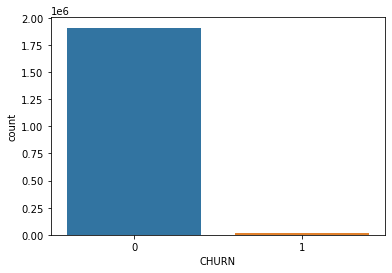

In [38]:
sns.countplot(x='CHURN', data=dataset)

In [39]:
print('Churn Rate : {0}%'.format(round(((sum(dataset['CHURN'])/len(dataset['CHURN']))*100),2)))

Churn Rate : 0.77%


Churn rate is too low. Imbalanced dataset. In order to balance the dataset we will use Use Oversampling. In
oversampling we won't end up with data loss(SMOTE or ADASYN methods)

## Detecting Outliers

Check whether the dataset has outliers or not.

,ONNET_TR_01,OFFNET_TR_01,PSTN_TR_01,ILD_TR_01
count,1925044.00,1925044.00,1925044.00,1925044.00
mean,546.62,22.49,0.73,0.66
std,909.52,84.62,41.75,9.71
min,0.00,0.00,0.00,0.00
25%,11.56,0.00,0.00,0.00
50%,200.97,0.00,0.00,0.00
75%,718.76,8.45,0.00,0.00
max,40006.74,5963.54,57384.42,3627.03


,ONNET_TR_02,OFFNET_TR_02,PSTN_TR_02,ILD_TR_02
count,1925044.00,1925044.00,1925044.00,1925044.00
mean,542.56,21.87,0.67,0.62
std,901.57,83.12,20.85,8.02
min,0.00,0.00,0.00,0.00
25%,8.28,0.00,0.00,0.00
50%,194.28,0.00,0.00,0.00
75%,715.56,7.90,0.00,0.00
max,41861.68,6755.77,27853.17,2102.67


,ONNET_TR_03,OFFNET_TR_03,PSTN_TR_03,ILD_TR_03
count,1925044.00,1925044.00,1925044.00,1925044.00
mean,599.46,23.74,0.67,0.67
std,985.51,90.31,6.08,10.26
min,0.00,0.00,0.00,0.00
25%,8.51,0.00,0.00,0.00
50%,218.24,0.00,0.00,0.00
75%,800.82,8.77,0.00,0.00
max,135149.73,8123.96,2883.33,6502.95


,ONNET_TR_04,OFFNET_TR_04,PSTN_TR_04,ILD_TR_04
count,1925044.00,1925044.00,1925044.00,1925044.00
mean,594.94,22.06,0.63,0.53
std,999.21,87.11,8.03,9.08
min,0.00,0.00,0.00,0.00
25%,3.09,0.00,0.00,0.00
50%,191.51,0.00,0.00,0.00
75%,791.36,7.29,0.00,0.00
max,45101.13,7557.82,7280.16,6242.62


,ONNET_TR_05,OFFNET_TR_05,PSTN_TR_05,ILD_TR_05
count,1925044.00,1925044.00,1925044.00,1925044.00
mean,656.02,22.26,0.63,0.52
std,1117.36,92.25,6.92,7.97
min,0.00,0.00,0.00,0.00
25%,0.89,0.00,0.00,0.00
50%,190.21,0.00,0.00,0.00
75%,869.70,6.49,0.00,0.00
max,39111.93,9603.66,4891.23,2347.35


,ONNET_TR_06,OFFNET_TR_06,PSTN_TR_06,ILD_TR_06
count,1925044.00,1925044.00,1925044.00,1925044.00
mean,346.95,23.02,0.60,0.49
std,570.40,93.14,9.22,7.51
min,0.00,0.00,0.00,0.00
25%,0.27,0.00,0.00,0.00
50%,108.58,0.00,0.00,0.00
75%,474.17,6.75,0.00,0.00
max,21075.13,8572.44,9967.42,2019.43


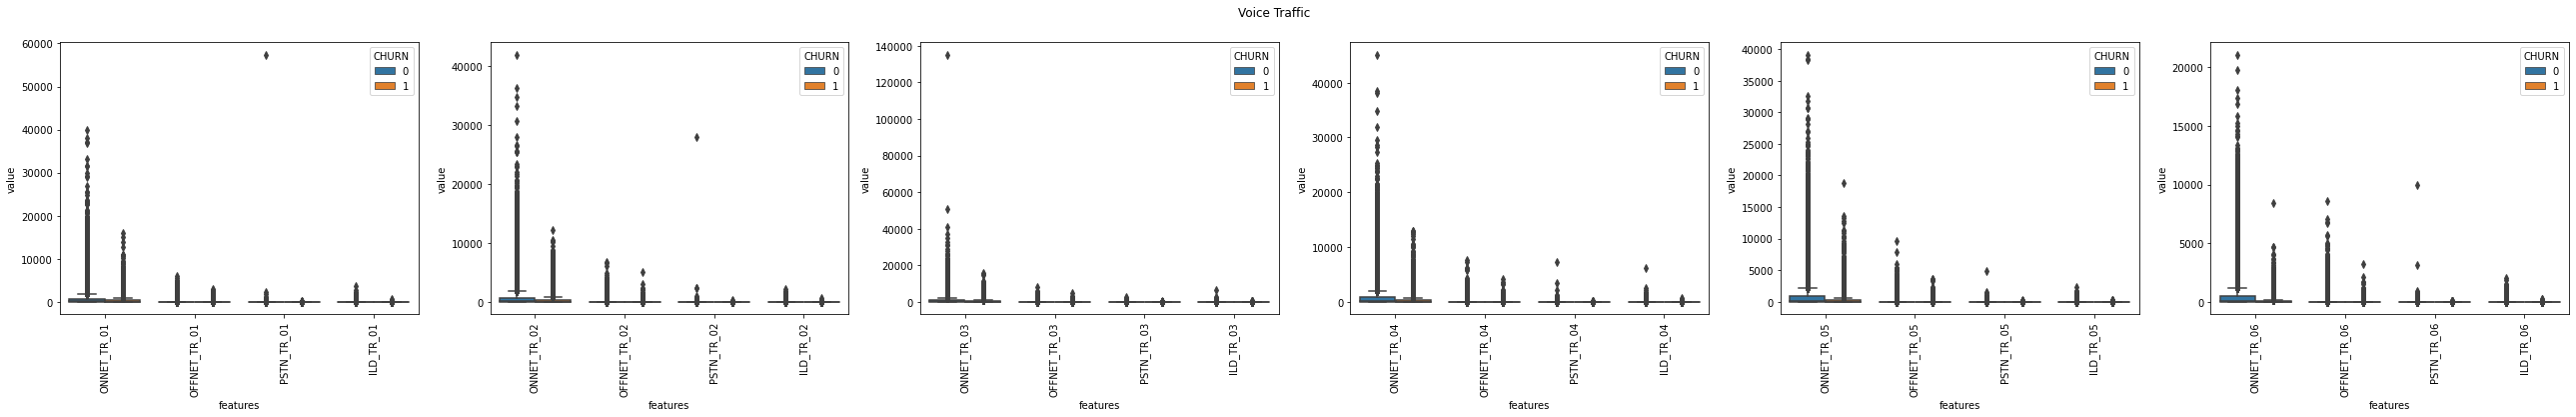

In [40]:
cols = [['ONNET_TR_01','OFFNET_TR_01','PSTN_TR_01','ILD_TR_01'],
        ['ONNET_TR_02','OFFNET_TR_02','PSTN_TR_02','ILD_TR_02'],
        ['ONNET_TR_03','OFFNET_TR_03','PSTN_TR_03','ILD_TR_03'],
        ['ONNET_TR_04','OFFNET_TR_04','PSTN_TR_04','ILD_TR_04'],
        ['ONNET_TR_05','OFFNET_TR_05','PSTN_TR_05','ILD_TR_05'],
        ['ONNET_TR_06','OFFNET_TR_06','PSTN_TR_06','ILD_TR_06']]

# column description stats
for i in range(0,6):
    display(dataset[cols[i]].describe())

# plot for the Traffic
plt.figure(figsize=(45, 5))
for i in range(0,6):
    plt.subplot(1,6,i+1)
    X = pd.concat([dataset[cols[i]], dataset['CHURN']], axis=1)
    X = pd.melt(X,id_vars="CHURN",var_name="features",value_name='value')
    sns.boxplot(x="features", y="value", hue="CHURN", data=X)
    plt.xticks(rotation=90)    
    plt.suptitle('Voice Traffic')

,ONNET_RV_01,OFFNET_RV_01,PSTN_RV_01,ILD_RV_01
count,1925044.00,1925044.00,1925044.00,1925044.00
mean,3.03,1.11,0.03,0.22
std,3.86,3.64,1.40,2.25
min,0.00,0.00,0.00,0.00
25%,0.04,0.00,0.00,0.00
50%,2.60,0.00,0.00,0.00
75%,4.73,0.52,0.00,0.00
max,163.21,263.67,1908.82,935.04


,ONNET_RV_02,OFFNET_RV_02,PSTN_RV_02,ILD_RV_02
count,1925044.00,1925044.00,1925044.00,1925044.00
mean,2.84,1.06,0.03,0.21
std,3.78,3.56,0.70,1.96
min,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.00
50%,2.48,0.00,0.00,0.00
75%,4.31,0.52,0.00,0.00
max,280.79,309.79,911.71,720.83


,ONNET_RV_03,OFFNET_RV_03,PSTN_RV_03,ILD_RV_03
count,1925044.00,1925044.00,1925044.00,1925044.00
mean,3.10,1.15,0.03,0.23
std,4.18,3.86,0.24,2.56
min,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.00
50%,2.60,0.00,0.00,0.00
75%,4.73,0.53,0.00,0.00
max,207.85,285.88,112.78,1531.10


,ONNET_RV_04,OFFNET_RV_04,PSTN_RV_04,ILD_RV_04
count,1925044.00,1925044.00,1925044.00,1925044.00
mean,3.25,1.15,0.03,0.18
std,4.82,4.04,0.30,2.13
min,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.00
50%,2.56,0.00,0.00,0.00
75%,4.73,0.52,0.00,0.00
max,264.42,393.82,215.35,1412.67


,ONNET_RV_05,OFFNET_RV_05,PSTN_RV_05,ILD_RV_05
count,1925044.00,1925044.00,1925044.00,1925044.00
mean,3.37,1.29,0.03,0.18
std,4.89,4.33,0.28,1.94
min,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.00
50%,2.76,0.00,0.00,0.00
75%,4.73,0.56,0.00,0.00
max,298.09,322.67,132.93,601.12


,ONNET_RV_06,OFFNET_RV_06,PSTN_RV_06,ILD_RV_06
count,1925044.00,1925044.00,1925044.00,1925044.00
mean,3.33,1.37,0.03,0.18
std,4.81,4.52,0.35,1.87
min,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.00
50%,2.67,0.00,0.00,0.00
75%,4.73,0.67,0.00,0.00
max,264.23,362.95,306.95,552.97


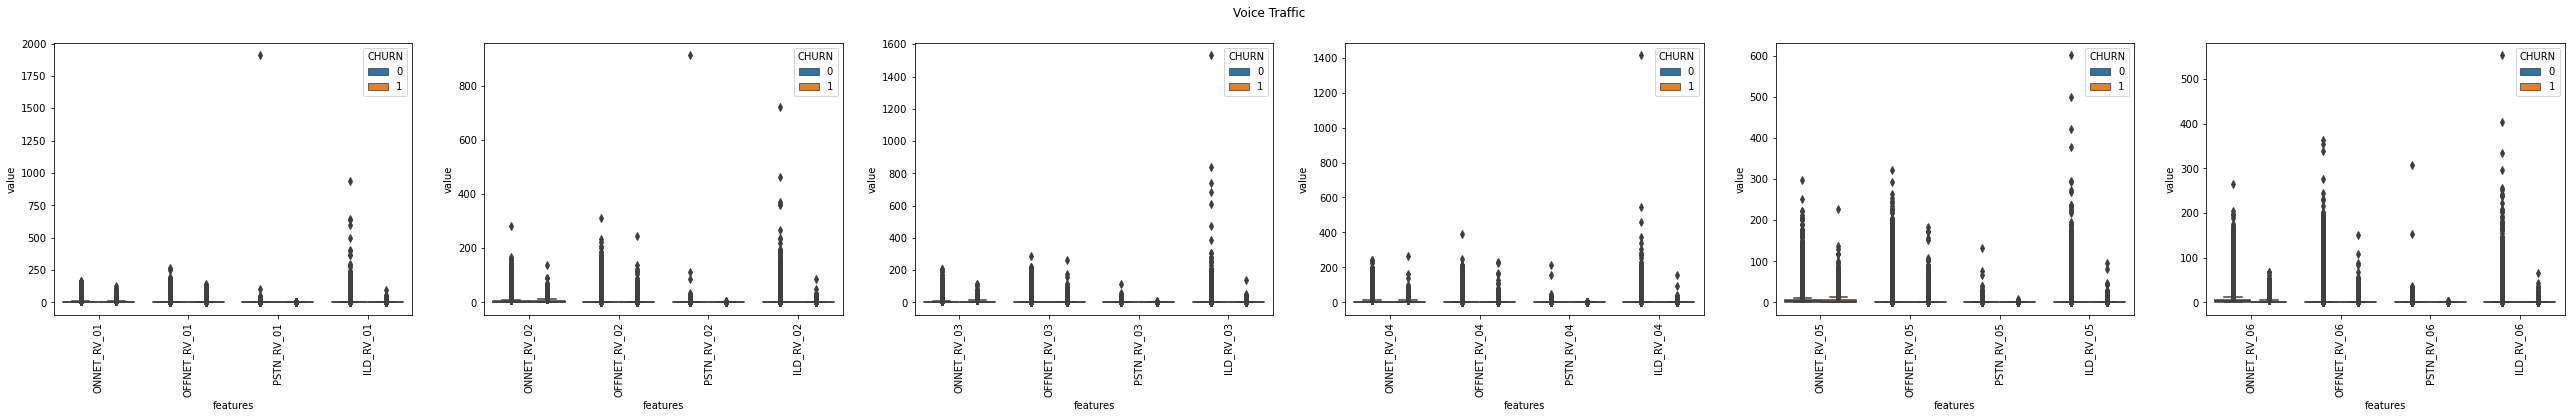

In [41]:
cols = [['ONNET_RV_01','OFFNET_RV_01','PSTN_RV_01','ILD_RV_01'],
        ['ONNET_RV_02','OFFNET_RV_02','PSTN_RV_02','ILD_RV_02'],
        ['ONNET_RV_03','OFFNET_RV_03','PSTN_RV_03','ILD_RV_03'],
        ['ONNET_RV_04','OFFNET_RV_04','PSTN_RV_04','ILD_RV_04'],
        ['ONNET_RV_05','OFFNET_RV_05','PSTN_RV_05','ILD_RV_05'],
        ['ONNET_RV_06','OFFNET_RV_06','PSTN_RV_06','ILD_RV_06']]

# column description stats
for i in range(0,6):
    display(dataset[cols[i]].describe())

# plot for the Traffic
plt.figure(figsize=(45, 5))
for i in range(0,6):
    plt.subplot(1,6,i+1)
    X = pd.concat([dataset[cols[i]], dataset['CHURN']], axis=1)
    X = pd.melt(X,id_vars="CHURN",var_name="features",value_name='value')
    sns.boxplot(x="features", y="value", hue="CHURN", data=X)
    plt.xticks(rotation=90)    
    plt.suptitle('Voice Traffic')

,DATA_TR_01
count,1925044.00
mean,2123.30
std,7735.85
min,0.00
25%,0.00
50%,0.01
75%,747.60
max,592790.53


,DATA_TR_02
count,1925044.00
mean,2033.70
std,7418.41
min,0.00
25%,0.00
50%,0.00
75%,691.41
max,404561.92


,DATA_TR_03
count,1925044.00
mean,2224.07
std,8279.73
min,0.00
25%,0.00
50%,0.00
75%,760.02
max,767366.50


,DATA_TR_04
count,1925044.00
mean,2190.77
std,8550.79
min,0.00
25%,0.00
50%,0.00
75%,647.52
max,703680.37


,DATA_TR_05
count,1925044.00
mean,2574.79
std,10816.99
min,0.00
25%,0.00
50%,0.00
75%,682.56
max,915799.53


,DATA_TR_06
count,1925044.00
mean,2114.87
std,8503.74
min,0.00
25%,0.00
50%,0.00
75%,637.30
max,1393446.11


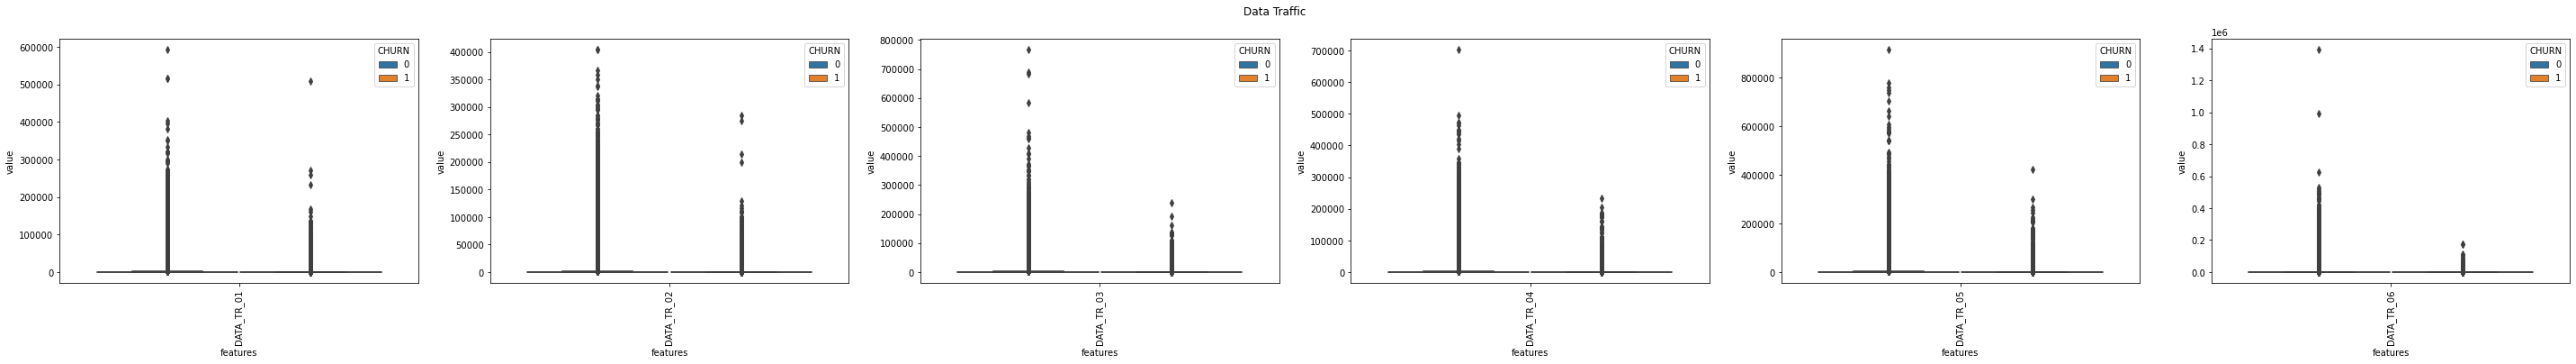

In [42]:
cols = [['DATA_TR_01'],
        ['DATA_TR_02'],
        ['DATA_TR_03'],
        ['DATA_TR_04'],
        ['DATA_TR_05'],
        ['DATA_TR_06']]

# column description stats
for i in range(0,6):
    display(dataset[cols[i]].describe())

# plot for the Data Traffic
plt.figure(figsize=(50, 5))
plt.subplots_adjust(hspace=5)
for i in range(0,6):
    plt.subplot(1,6,i+1)
    X = pd.concat([dataset[cols[i]], dataset['CHURN']], axis=1)
    X = pd.melt(X,id_vars="CHURN",var_name="features",value_name='value')
    sns.boxplot(x="features", y="value", hue="CHURN", data=X)
    plt.xticks(rotation=90)    
    plt.suptitle('Data Traffic')

,DATA_RV_01
count,1925044.00
mean,6.54
std,25.34
min,0.00
25%,0.00
50%,0.67
75%,4.01
max,12863.29


,DATA_RV_02
count,1925044.00
mean,4.70
std,13.96
min,0.00
25%,0.00
50%,0.45
75%,4.01
max,2808.09


,DATA_RV_03
count,1925044.00
mean,4.85
std,13.65
min,0.00
25%,0.00
50%,0.60
75%,4.01
max,3536.81


,DATA_RV_04
count,1925044.00
mean,4.38
std,12.61
min,0.00
25%,0.00
50%,0.33
75%,4.01
max,1890.55


,DATA_RV_05
count,1925044.00
mean,4.92
std,14.13
min,0.00
25%,0.00
50%,0.50
75%,4.85
max,3804.86


,DATA_RV_06
count,1925044.00
mean,4.58
std,12.42
min,0.00
25%,0.00
50%,0.36
75%,5.01
max,3050.76


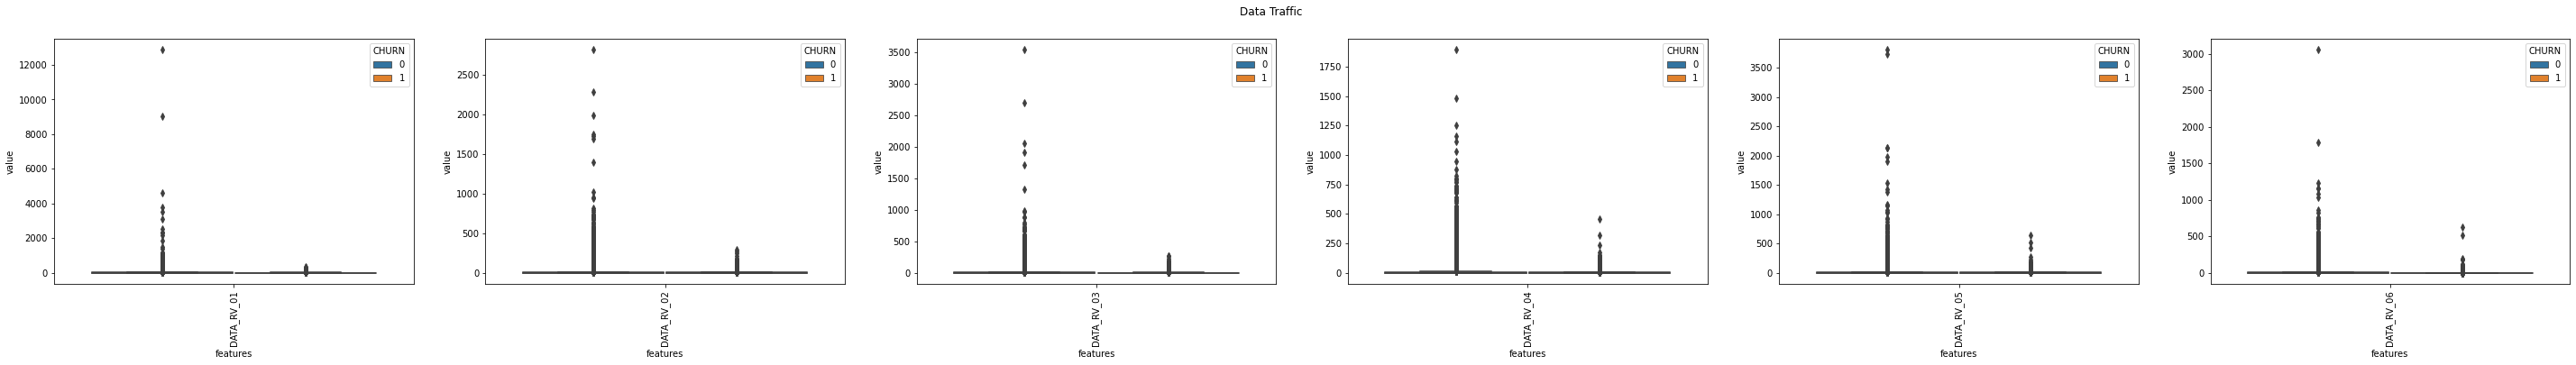

In [43]:
cols = [['DATA_RV_01'],
        ['DATA_RV_02'],
        ['DATA_RV_03'],
        ['DATA_RV_04'],
        ['DATA_RV_05'],
        ['DATA_RV_06']]

# column description stats
for i in range(0,6):
    display(dataset[cols[i]].describe())

# plot for the Data Traffic
plt.figure(figsize=(50, 5))
plt.subplots_adjust(hspace=5)
for i in range(0,6):
    plt.subplot(1,6,i+1)
    X = pd.concat([dataset[cols[i]], dataset['CHURN']], axis=1)
    X = pd.melt(X,id_vars="CHURN",var_name="features",value_name='value')
    sns.boxplot(x="features", y="value", hue="CHURN", data=X)
    plt.xticks(rotation=90)    
    plt.suptitle('Data Traffic')

,ARPU_01
count,1925044.00
mean,0.00
std,0.00
min,0.00
25%,0.00
50%,0.00
75%,0.00
max,0.01


,ARPU_02
count,1925044.00
mean,0.00
std,0.00
min,0.00
25%,0.00
50%,0.00
75%,0.00
max,0.00


,ARPU_03
count,1925044.00
mean,0.00
std,0.00
min,0.00
25%,0.00
50%,0.00
75%,0.00
max,0.00


,ARPU_04
count,1925044.00
mean,0.00
std,0.00
min,0.00
25%,0.00
50%,0.00
75%,0.00
max,0.01


,ARPU_05
count,1925044.00
mean,0.00
std,0.00
min,0.00
25%,0.00
50%,0.00
75%,0.00
max,0.00


,ARPU_06
count,1925044.00
mean,0.00
std,0.00
min,0.00
25%,0.00
50%,0.00
75%,0.00
max,0.00


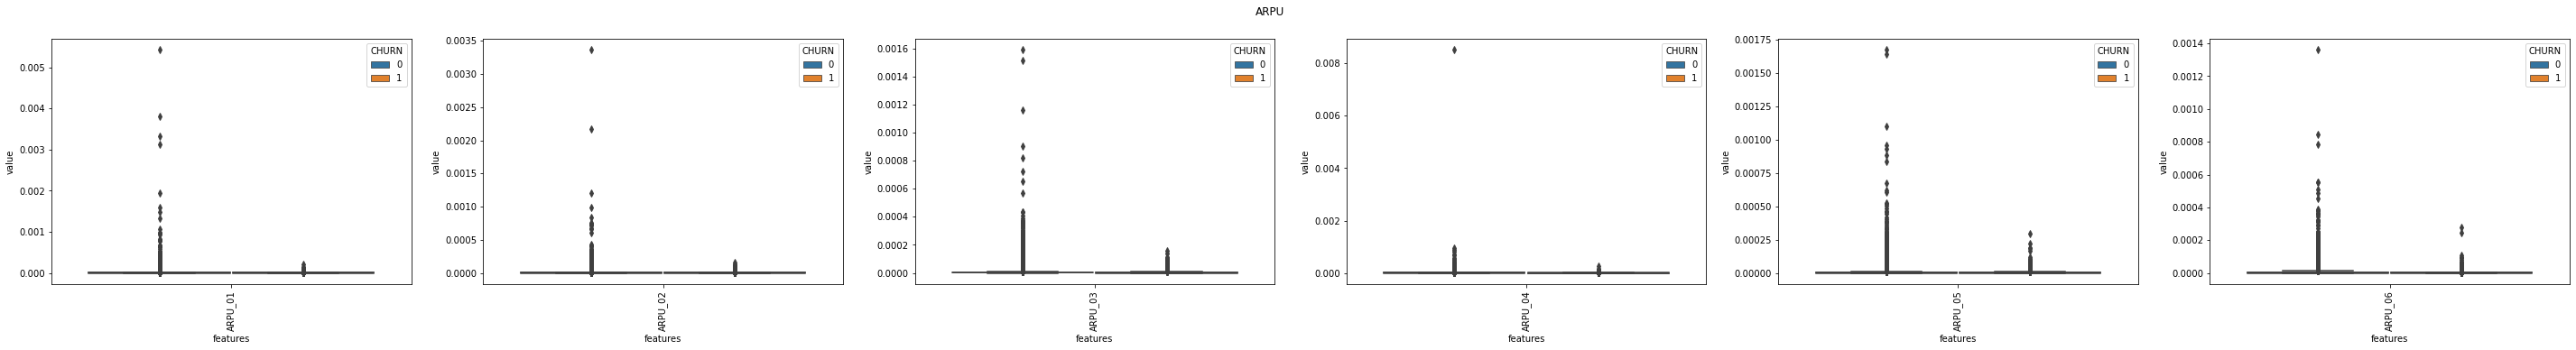

In [44]:
cols = [['ARPU_01'],
        ['ARPU_02'],
        ['ARPU_03'],
        ['ARPU_04'],
        ['ARPU_05'],
        ['ARPU_06']]

# column description stats
for i in range(0,6):
    display(dataset[cols[i]].describe())

# plot for the Data Traffic
plt.figure(figsize=(50, 5))
plt.subplots_adjust(hspace=5)
for i in range(0,6):
    plt.subplot(1,6,i+1)
    X = pd.concat([dataset[cols[i]], dataset['CHURN']], axis=1)
    X = pd.melt(X,id_vars="CHURN",var_name="features",value_name='value')
    sns.boxplot(x="features", y="value", hue="CHURN", data=X)
    plt.xticks(rotation=90)    
    plt.suptitle('ARPU')

,TOTAL_RV_01
count,1925044.00
mean,12.48
std,28.93
min,0.00
25%,1.78
50%,6.42
75%,12.95
max,12863.94


,TOTAL_RV_02
count,1925044.00
mean,10.27
std,18.74
min,0.00
25%,1.24
50%,5.93
75%,11.55
max,7942.27


,TOTAL_RV_03
count,1925044.00
mean,10.85
std,17.69
min,0.00
25%,1.50
50%,6.36
75%,12.63
max,3745.64


,TOTAL_RV_04
count,1925044.00
mean,10.47
std,22.30
min,0.00
25%,1.03
50%,6.11
75%,12.14
max,19769.53


,TOTAL_RV_05
count,1925044.00
mean,10.99
std,18.58
min,0.00
25%,0.66
50%,6.05
75%,12.99
max,3834.02


,TOTAL_RV_06
count,1925044.00
mean,10.68
std,17.21
min,0.00
25%,0.52
50%,5.94
75%,12.71
max,3090.95


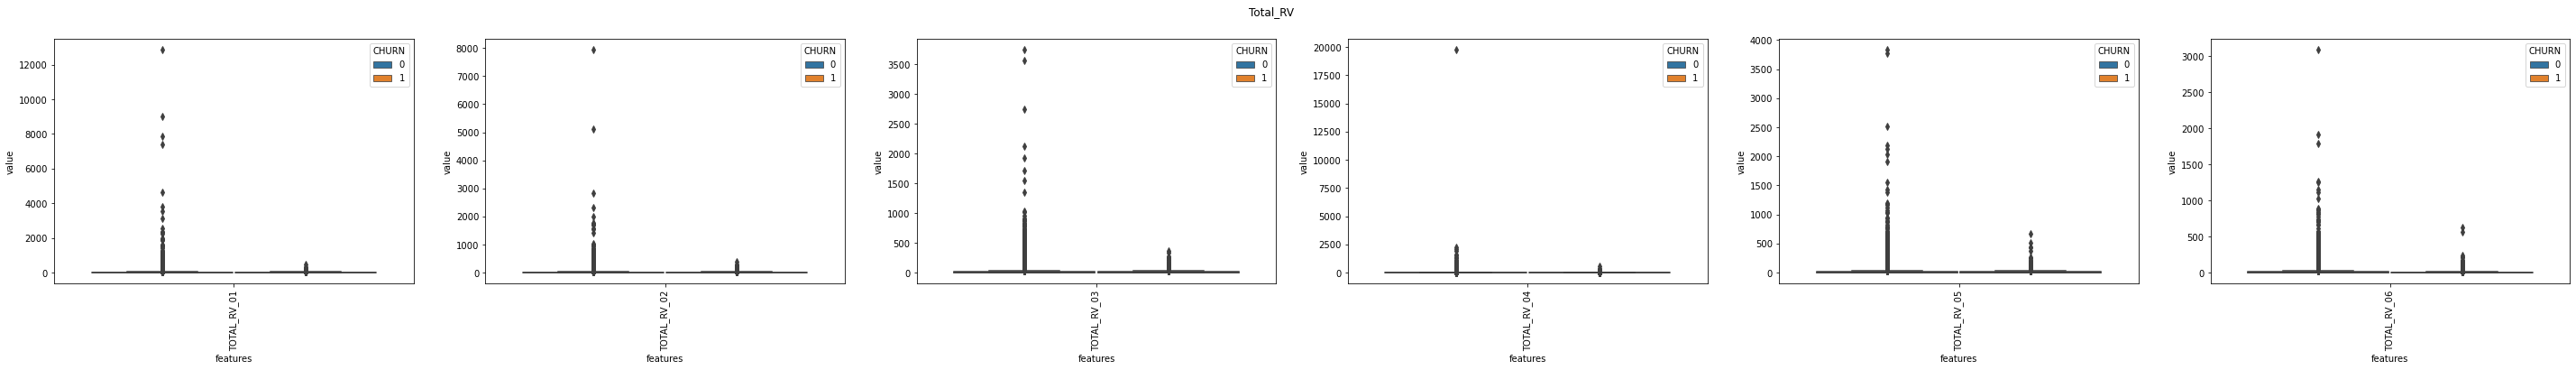

In [45]:
cols = [['TOTAL_RV_01'],
        ['TOTAL_RV_02'],
        ['TOTAL_RV_03'],
        ['TOTAL_RV_04'],
        ['TOTAL_RV_05'],
        ['TOTAL_RV_06']]

# column description stats
for i in range(0,6):
    display(dataset[cols[i]].describe())

# plot for the Data Traffic
plt.figure(figsize=(50, 5))
plt.subplots_adjust(hspace=5)
for i in range(0,6):
    plt.subplot(1,6,i+1)
    X = pd.concat([dataset[cols[i]], dataset['CHURN']], axis=1)
    X = pd.melt(X,id_vars="CHURN",var_name="features",value_name='value')
    sns.boxplot(x="features", y="value", hue="CHURN", data=X)
    plt.xticks(rotation=90)    
    plt.suptitle('Total_RV')

,TOTAL_TR_01
count,1925044.00
mean,570.50
std,916.98
min,0.00
25%,16.93
50%,236.40
75%,756.70
max,57384.42


,TOTAL_TR_02
count,1925044.00
mean,565.72
std,908.09
min,0.00
25%,12.63
50%,229.33
75%,752.58
max,41943.62


,TOTAL_TR_03
count,1925044.00
mean,624.53
std,992.15
min,0.00
25%,13.09
50%,257.60
75%,840.49
max,135166.26


,TOTAL_TR_04
count,1925044.00
mean,618.17
std,1005.66
min,0.00
25%,5.33
50%,228.13
75%,829.45
max,45194.75


,TOTAL_TR_05
count,1925044.00
mean,679.44
std,1123.89
min,0.00
25%,2.05
50%,227.61
75%,908.88
max,39111.93


,TOTAL_TR_06
count,1925044.00
mean,371.06
std,581.65
min,0.00
25%,0.92
50%,140.04
75%,515.77
max,21078.13


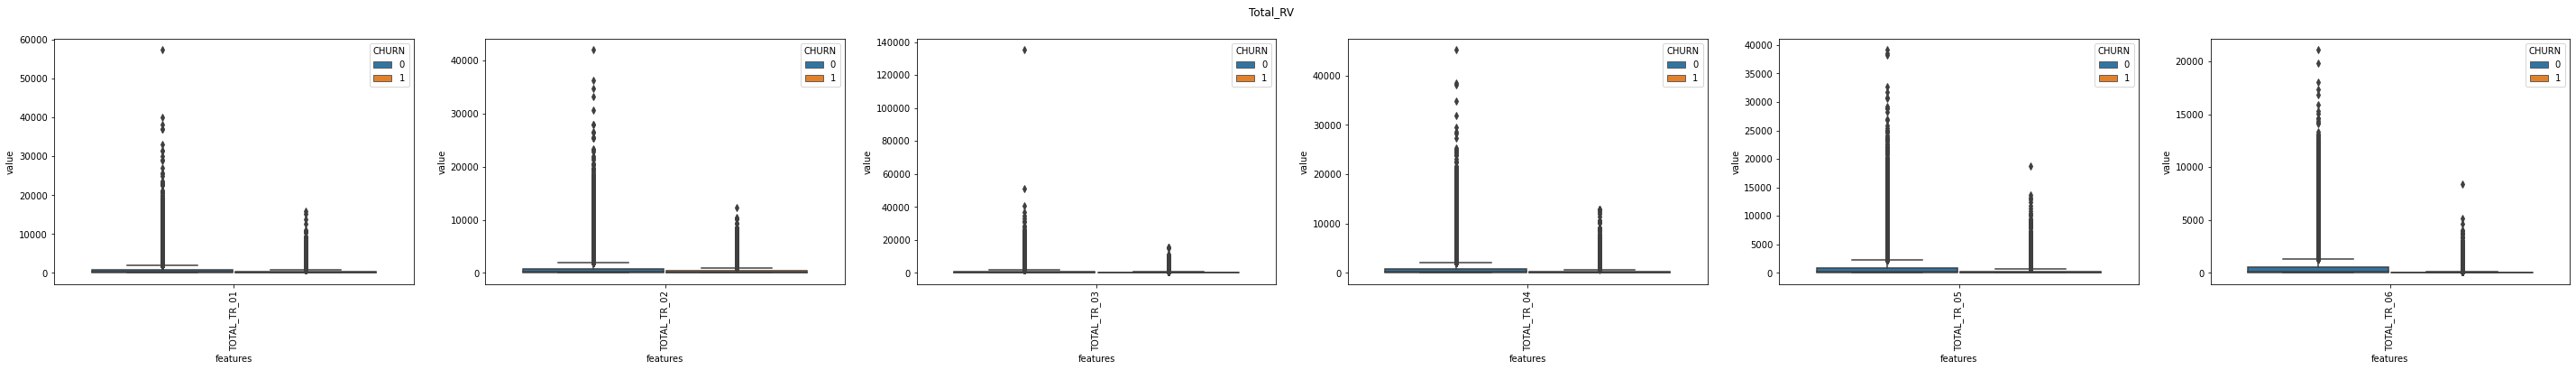

In [46]:
cols = [['TOTAL_TR_01'],
        ['TOTAL_TR_02'],
        ['TOTAL_TR_03'],
        ['TOTAL_TR_04'],
        ['TOTAL_TR_05'],
        ['TOTAL_TR_06']]

# column description stats
for i in range(0,6):
    display(dataset[cols[i]].describe())

# plot for the Data Traffic
plt.figure(figsize=(50, 5))
plt.subplots_adjust(hspace=5)
for i in range(0,6):
    plt.subplot(1,6,i+1)
    X = pd.concat([dataset[cols[i]], dataset['CHURN']], axis=1)
    X = pd.melt(X,id_vars="CHURN",var_name="features",value_name='value')
    sns.boxplot(x="features", y="value", hue="CHURN", data=X)
    plt.xticks(rotation=90)    
    plt.suptitle('Total_RV')

,dataUser_01,dataBins_01,SVM_01
count,1925044.00,1925044.00,1925044.00
mean,0.51,2.34,3.11
std,0.50,1.85,1.30
min,0.00,1.00,1.00
25%,0.00,1.00,2.00
50%,1.00,2.00,3.00
75%,1.00,3.00,4.00
max,1.00,8.00,6.00


,dataUser_02,dataBins_02,SVM_02
count,1925044.00,1925044.00,1925044.00
mean,0.50,2.30,3.01
std,0.50,1.83,1.27
min,0.00,1.00,1.00
25%,0.00,1.00,2.00
50%,0.00,1.00,3.00
75%,1.00,3.00,4.00
max,1.00,8.00,6.00


,dataUser_03,dataBins_03,SVM_03
count,1925044.00,1925044.00,1925044.00
mean,0.49,2.32,3.06
std,0.50,1.87,1.29
min,0.00,1.00,1.00
25%,0.00,1.00,2.00
50%,0.00,1.00,3.00
75%,1.00,3.00,4.00
max,1.00,8.00,6.00


,dataUser_04,dataBins_04,SVM_04
count,1925044.00,1925044.00,1925044.00
mean,0.48,2.28,3.01
std,0.50,1.85,1.31
min,0.00,1.00,1.00
25%,0.00,1.00,2.00
50%,0.00,1.00,3.00
75%,1.00,3.00,4.00
max,1.00,8.00,6.00


,dataUser_05,dataBins_05,SVM_05
count,1925044.00,1925044.00,1925044.00
mean,0.48,2.31,3.04
std,0.50,1.90,1.37
min,0.00,1.00,1.00
25%,0.00,1.00,2.00
50%,0.00,1.00,3.00
75%,1.00,3.00,4.00
max,1.00,8.00,6.00


,dataUser_06,dataBins_06,SVM_06
count,1925044.00,1925044.00,1925044.00
mean,0.47,2.27,3.02
std,0.50,1.84,1.37
min,0.00,1.00,1.00
25%,0.00,1.00,2.00
50%,0.00,1.00,3.00
75%,1.00,3.00,4.00
max,1.00,8.00,6.00


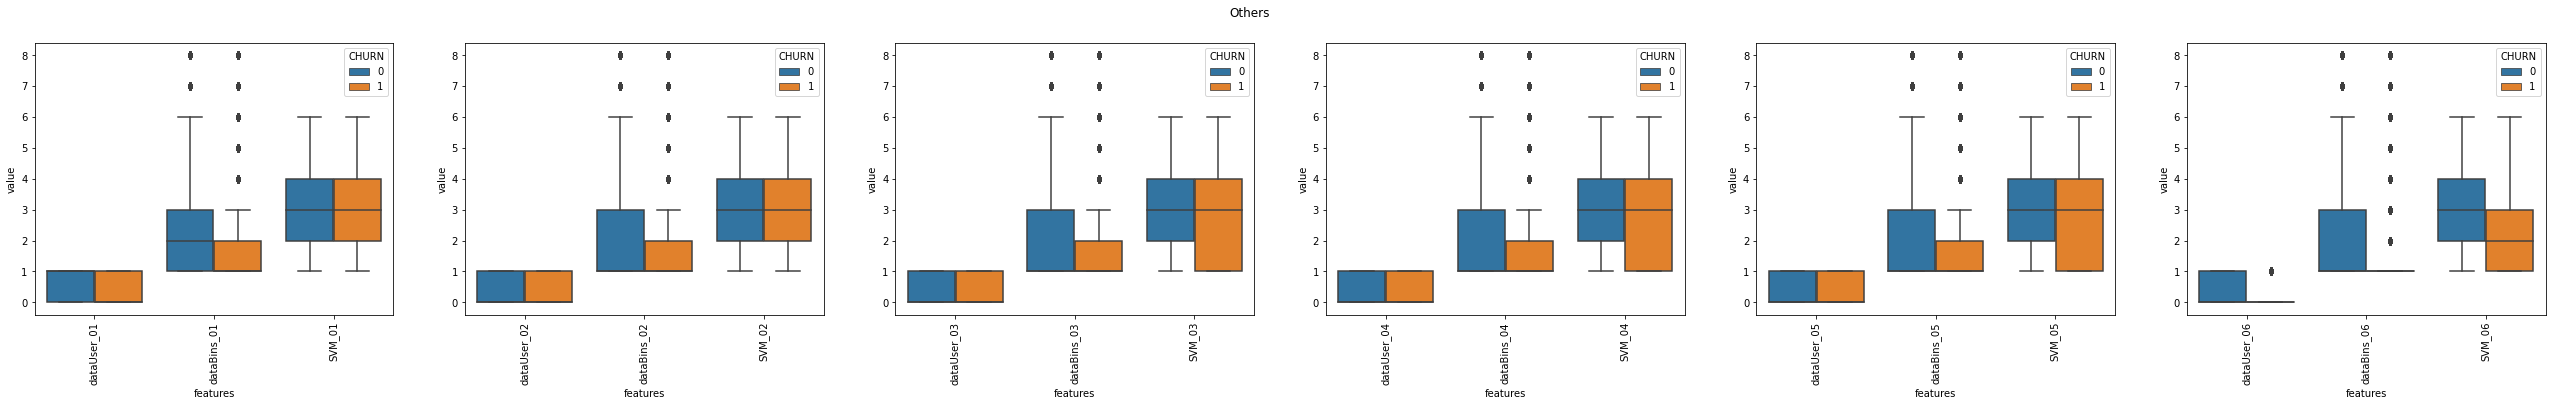

In [47]:
cols = [['dataUser_01','dataBins_01','SVM_01'],
        ['dataUser_02','dataBins_02','SVM_02'],
        ['dataUser_03','dataBins_03','SVM_03'],
        ['dataUser_04','dataBins_04','SVM_04'],
        ['dataUser_05','dataBins_05','SVM_05'],
        ['dataUser_06','dataBins_06','SVM_06']]
  

# column description stats
for i in range(0,6):
    display(dataset[cols[i]].describe())

# plot for the Traffic
plt.figure(figsize=(45, 5))
for i in range(0,6):
    plt.subplot(1,6,i+1)
    X = pd.concat([dataset[cols[i]], dataset['CHURN']], axis=1)
    X = pd.melt(X,id_vars="CHURN",var_name="features",value_name='value')
    sns.boxplot(x="features", y="value", hue="CHURN", data=X)
    plt.xticks(rotation=90)    
    plt.suptitle('Others')

## Removing Outliers

in order to delete the outliers we use interquartile range. anything out of the range will be deleted 

In [48]:
cols_to_exclude = ['dataUser_01','dataUser_02','dataUser_03','dataUser_04','dataUser_05', 'dataUser_06',
                   'SVM_01','SVM_02','SVM_03','SVM_04','SVM_05','SVM_06', 'dataBins_01','dataBins_02',
                   'dataBins_03','dataBins_04','dataBins_05','dataBins_06','CHURN']

cols = list(set(dataset.columns).difference(set(cols_to_exclude)))



for col in cols:
    
    print(col)
    q1, q3 = np.percentile(dataset[dataset[col]!=0][col], [25,75])
    print("Q1: ", q1)
    print("Q3: ", q3)
    iqr_value = q3-q1
    print("IQR_VALUE: ", iqr_value)
    lower_bound_val = q1 - (1.5 * iqr_value)
    upper_bound_val = q3 + (1.5 * iqr_value)
    pd.cut(dataset[col], [-1000000, lower_bound_val, upper_bound_val, 1000000]).value_counts()
    
    a = lower_bound_val.astype(float)
    b = upper_bound_val.astype(float)
    print("Lower Bound: ", a)
    print("Upper Bound", b)
    

    for i in dataset[col].values:
        if i < a:
            dataset[col].replace(i, np.nan, inplace=True)
        elif i > b:
            dataset[col].replace(i, np.nan, inplace=True)

    print("****************************")

ILD_TR_04
Q1:  0.31710900000000003
Q3:  7.0065
IQR_VALUE:  6.689391
Lower Bound:  -9.716977499999999
Upper Bound 17.0405865
****************************
TOTAL_TR_04
Q1:  112.622827
Q3:  1053.3105
IQR_VALUE:  940.687673
Lower Bound:  -1298.4086825000002
Upper Bound 2464.3420095
****************************
ARPU_04
Q1:  1.7093417912261798e-06
Q3:  6.23599661869841e-06
IQR_VALUE:  4.52665482747223e-06
Lower Bound:  -5.080640449982165e-06
Upper Bound 1.3025978859906756e-05
****************************
TOTAL_RV_06
Q1:  4.102505730427764
Q3:  15.41599596448749
IQR_VALUE:  11.313490234059724
Lower Bound:  -12.86772962066182
Upper Bound 32.38623131557708
****************************
OFFNET_RV_04
Q1:  0.2970137355932204
Q3:  2.2090398635996773
IQR_VALUE:  1.912026128006457
Lower Bound:  -2.571025456416465
Upper Bound 5.077079055609363
****************************
ONNET_TR_05
Q1:  97.773891
Q3:  1156.8798044999999
IQR_VALUE:  1059.1059134999998
Lower Bound:  -1490.8849792499998
Upper Bound 2745.

Q1:  0.7208910000000001
Q3:  6.747000000000001
IQR_VALUE:  6.026109000000001
Lower Bound:  -8.3182725
Upper Bound 15.7861635
****************************
TOTAL_TR_01
Q1:  108.961282
Q3:  919.898955
IQR_VALUE:  810.937673
Lower Bound:  -1107.4452275
Upper Bound 2136.3054645
****************************
DATA_RV_03
Q1:  0.8353510895883777
Q3:  9.426547382566586
IQR_VALUE:  8.591196292978209
Lower Bound:  -12.051443349878936
Upper Bound 22.313341822033898
****************************
ILD_RV_03
Q1:  0.44552058111380144
Q3:  2.673123486682809
IQR_VALUE:  2.2276029055690074
Lower Bound:  -2.8958837772397095
Upper Bound 6.01452784503632
****************************
ARPU_06
Q1:  1.8046668026353881e-06
Q3:  6.781400922935662e-06
IQR_VALUE:  4.9767341203002734e-06
Lower Bound:  -5.660434377815022e-06
Upper Bound 1.4246502103386072e-05
****************************
ILD_RV_04
Q1:  0.44552058111380144
Q3:  2.673123486682809
IQR_VALUE:  2.2276029055690074
Lower Bound:  -2.8958837772397095
Upper Bound 

### Skewness results before removing outliers

D:\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


5.3790938712727305

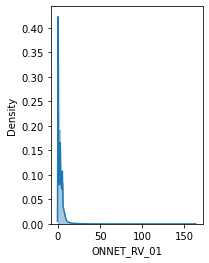

In [44]:
plt.subplot(122)
sns.distplot(dataset.ONNET_RV_01)
dataset['ONNET_RV_01'].skew()

### Skewness results after removing the outliers

D:\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


0.7103318808624225

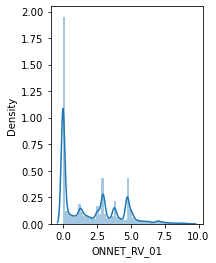

In [52]:
plt.subplot(122)
sns.distplot(dataset.ONNET_RV_01)
dataset['ONNET_RV_01'].skew()

In [49]:
dataset = dataset.dropna()

In [51]:
dataset.shape

(1115643, 97)

## Feature Engineering

In [54]:
dataset.to_csv(r'C:\Users\пк\Desktop\Modified\modified_without_outliers.csv', index=False)

In [67]:
dataset_fe = pd.read_csv(r'C:\Users\пк\Desktop\Modified\modified_without_outliers.csv')

In [86]:
churn = dataset_fe['CHURN']
dataset_fe_noChurn = dataset_fe.drop('CHURN', axis=1)

In [87]:
dataset_fe_noChurn.skew()

ARPU_01         1.49
TOTAL_RV_01     1.49
TOTAL_TR_01     1.69
ONNET_TR_01     1.69
OFFNET_TR_01    4.32
PSTN_TR_01     10.37
DATA_TR_01      4.45
ILD_TR_01      10.97
ONNET_RV_01     0.71
OFFNET_RV_01    4.03
PSTN_RV_01     10.31
DATA_RV_01      3.26
ILD_RV_01       9.27
dataUser_01     0.39
dataBins_01     1.34
SVM_01         -0.18
ARPU_02         1.42
TOTAL_RV_02     1.42
TOTAL_TR_02     1.71
ONNET_TR_02     1.72
OFFNET_TR_02    4.50
PSTN_TR_02     11.15
DATA_TR_02      4.50
ILD_TR_02      11.39
ONNET_RV_02     0.75
OFFNET_RV_02    4.23
PSTN_RV_02     10.74
DATA_RV_02      3.17
ILD_RV_02       9.71
dataUser_02     0.48
dataBins_02     1.33
SVM_02         -0.15
ARPU_03         1.41
TOTAL_RV_03     1.41
TOTAL_TR_03     1.68
ONNET_TR_03     1.69
OFFNET_TR_03    4.40
PSTN_TR_03     11.14
DATA_TR_03      4.47
ILD_TR_03      10.80
ONNET_RV_03     0.73
OFFNET_RV_03    4.12
PSTN_RV_03     11.19
DATA_RV_03      3.17
ILD_RV_03       8.93
dataUser_03     0.49
dataBins_03     1.36
SVM_03       

### Standardize the numerical features

#### Now, we'll standardize(rescale) the numerical features so as to have mean as 0 and SD as 1

##### Does it really work ?  Can't really spot any differences

In [88]:
dataset_fe_std = (( dataset_fe_noChurn - dataset_fe_noChurn.mean() ) / dataset_fe_noChurn.std()) #standardized data

In [89]:
dataset_fe_std.skew()

ARPU_01         1.49
TOTAL_RV_01     1.49
TOTAL_TR_01     1.69
ONNET_TR_01     1.69
OFFNET_TR_01    4.32
PSTN_TR_01     10.37
DATA_TR_01      4.45
ILD_TR_01      10.97
ONNET_RV_01     0.71
OFFNET_RV_01    4.03
PSTN_RV_01     10.31
DATA_RV_01      3.26
ILD_RV_01       9.27
dataUser_01     0.39
dataBins_01     1.34
SVM_01         -0.18
ARPU_02         1.42
TOTAL_RV_02     1.42
TOTAL_TR_02     1.71
ONNET_TR_02     1.72
OFFNET_TR_02    4.50
PSTN_TR_02     11.15
DATA_TR_02      4.50
ILD_TR_02      11.39
ONNET_RV_02     0.75
OFFNET_RV_02    4.23
PSTN_RV_02     10.74
DATA_RV_02      3.17
ILD_RV_02       9.71
dataUser_02     0.48
dataBins_02     1.33
SVM_02         -0.15
ARPU_03         1.41
TOTAL_RV_03     1.41
TOTAL_TR_03     1.68
ONNET_TR_03     1.69
OFFNET_TR_03    4.40
PSTN_TR_03     11.14
DATA_TR_03      4.47
ILD_TR_03      10.80
ONNET_RV_03     0.73
OFFNET_RV_03    4.12
PSTN_RV_03     11.19
DATA_RV_03      3.17
ILD_RV_03       8.93
dataUser_03     0.49
dataBins_03     1.36
SVM_03       

Before doing the oversampling let's see how will the data behave

1. I have used PCA in order to reduce the dimensionality of dataset
2. Ran PCA before and after data standardization

## Handling the class imbalance (data is not standardized)

In [90]:
X = dataset_fe_noChurn
Y = churn

## Splitting into train and test sets

In [91]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=RANDOM_STATE)
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(780950, 96) (780950,)
(334693, 96) (334693,)


## PCA

Appplying PCA on the training dataset for dimensionality reduction and feature selection.

In [92]:
#initialize the pca with randomized
pca = PCA(svd_solver='randomized', random_state=RANDOM_STATE)
# fit the training dataset
pca.fit(X_train)

PCA(random_state=42, svd_solver='randomized')

Draw the screeplot for the PCA components and pick the right number of PC components to build the model

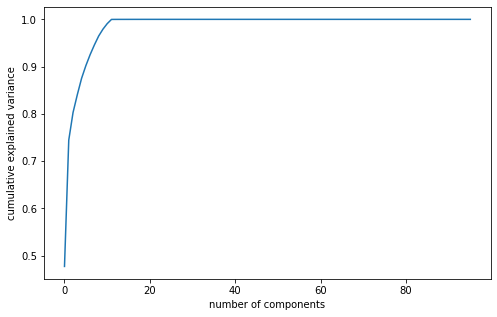

In [93]:
#Screeplot for the PCA components
%matplotlib inline
fig = plt.figure(figsize = (8,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

Chosen PCA components for model building

In [ ]:
# Initialize pca with 40 components
pca = PCA(n_components=40, random_state=RANDOM_STATE)
# fit and transform the training dataset
X_train_pca = pca.fit_transform(X_train)
# transform the testing dataset
X_test_pca = pca.transform(X_test)
# fit and transform the whole dataset
X_pca = pca.fit_transform(X)

## Handling the class imbalance (standardized)

In [94]:
X = dataset_fe_std
Y = churn

### Splitting into train and test sets

In [95]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=RANDOM_STATE)
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(780950, 96) (780950,)
(334693, 96) (334693,)


### PCA

In [96]:
#initialize the pca with randomized
pca = PCA(svd_solver='randomized', random_state=RANDOM_STATE)
# fit the training dataset
pca.fit(X_train)

PCA(random_state=42, svd_solver='randomized')

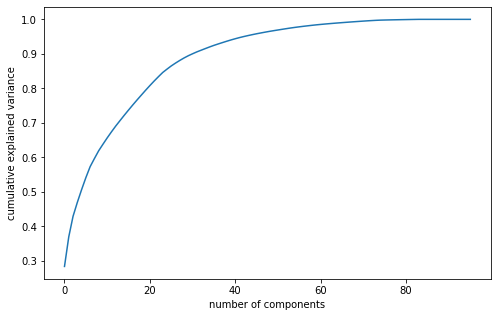

In [97]:
#Screeplot for the PCA components
%matplotlib inline
fig = plt.figure(figsize = (8,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

## Correlation with Response Variable

Bars are too small, it means that correlation is not that strong 

<AxesSubplot:title={'center':'Correlation with the Response Variable'}>

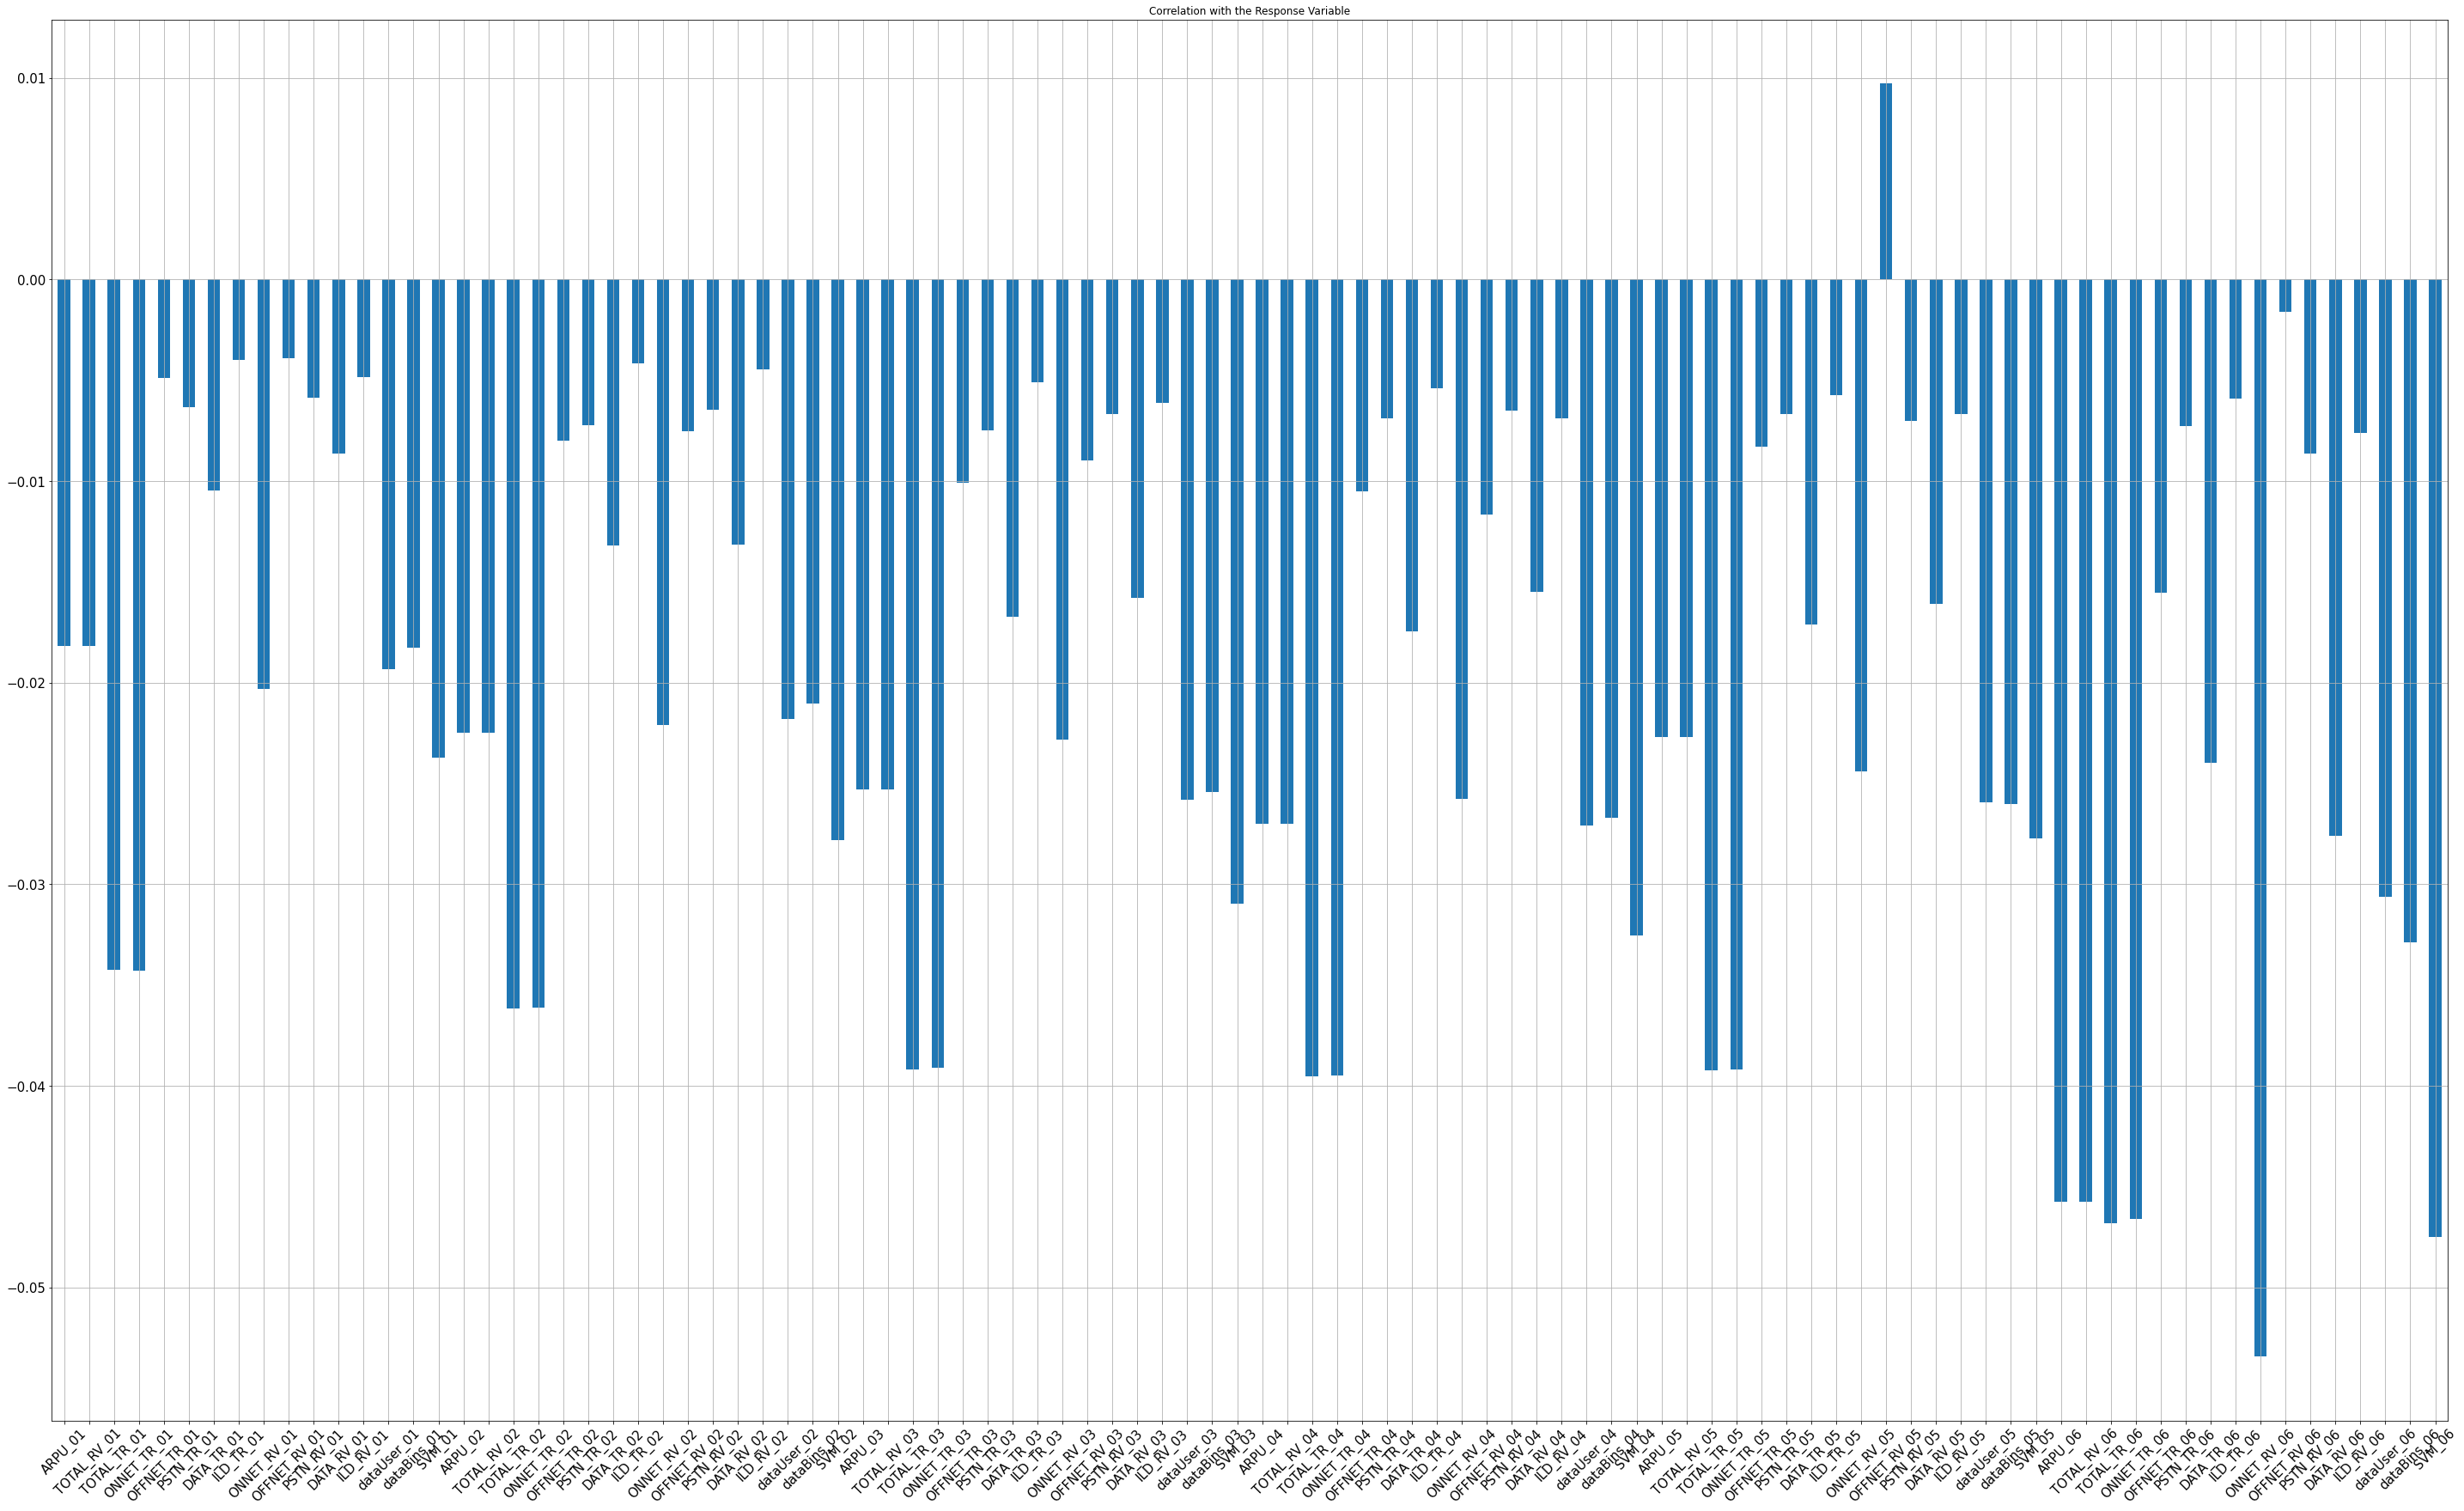

In [83]:
# if bar is above axis means that the more customer uses/spends the more likely they churn 
#(it might be due to being not happy of usage). 
#for bar under the axis works vice versa
# if the size of the bar is really small, so the correlation is not strong 

# dataset_fe is the original data set. The dataset right after removing the outliers

dataset_fe.drop(columns=['CHURN']).corrwith(dataset_fe.CHURN).plot.bar(figsize=(50,30), title="Correlation with the Response Variable",
                                                                 fontsize=15, rot=45, grid=True)

## Baseline Model Building

Created the list to store the scroing results of each prediction method

In [ ]:
model_score_list = []

In [ ]:
'''
Method Name : evaluate_model
Input(s)    : 2 series
Output(s)   : 4 float values  
Description :
- This method gets 2 series (actual and predicted) as inputs and compute the accuracy, ROC, Precision and Recall scores  
- Then returns the computed scores. 
'''
def evaluate_model(actual, pred):
    # Accuracy Score
    acc_score = round(accuracy_score(actual, pred)*100,2)
    print('Accuracy Score : ',acc_score)
    # ROC AUC score
    roc_score = round(roc_auc_score(actual, pred)*100,2)
    print('ROC AUC score : ',roc_score)
    # Precision score
    prec_score = round(precision_score(actual, pred)*100,2)
    print('Precision score : ', prec_score)
    # Recall score
    rec_score = round(recall_score(actual, pred)*100,2)
    print('Recall score : ', rec_score)

    return acc_score, roc_score, prec_score, rec_score
def evaluate_model(actual, pred):
    # Accuracy Score
    acc_score = round(accuracy_score(actual, pred)*100,2)
    print('Accuracy Score : ',acc_score)
    # ROC AUC score
    roc_score = round(roc_auc_score(actual, pred)*100,2)
    print('ROC AUC score : ',roc_score)
    # Precision score
    prec_score = round(precision_score(actual, pred)*100,2)
    print('Precision score : ', prec_score)
    # Recall score
    rec_score = round(recall_score(actual, pred)*100,2)
    print('Recall score : ', rec_score)

    return acc_score, roc_score, prec_score, rec_score

### Logistic Regression

In [ ]:
# Initialize the Logistic regression
model = LogisticRegression(class_weight='balanced', random_state=RANDOM_STATE)
# fit the pca training data
model.fit(X_train_pca, Y_train)
# predict the testing pca data
Y_pred = model.predict(X_test_pca)

# Model evaluation
acc_score, roc_score, prec_score,  rec_score = evaluate_model(Y_test, Y_pred)

# add the model scores to score list 
model_score_list.append({'model_name':'LogisticRegression', 'acc_score':acc_score, 'roc_score':roc_score, 'precision_score':prec_score, 'recall_score':rec_score})

### KNN

In [ ]:
# initialize the KNeighbors classifiers
model = KNeighborsClassifier()
# fit the pca training data
model.fit(X_train_pca, Y_train)
# predict the pca testing data
Y_pred = model.predict(X_test_pca)

# Model evaluation
acc_score, roc_score, prec_score, rec_score = evaluate_model(Y_test, Y_pred)
# add the model scores to score list
model_score_list.append({'model_name':'KNeighborsClassifier', 'acc_score':acc_score, 'roc_score':roc_score, 'precision_score':prec_score, 'recall_score':rec_score})

### LinearSVC

In [ ]:
# initialize the LinearSVC
model = LinearSVC(class_weight='balanced', random_state=RANDOM_STATE)
# fit the pca training data
model.fit(X_train_pca, Y_train)
# predict the pca testing data
Y_pred = model.predict(X_test_pca)

# Model evaluation
acc_score, roc_score, prec_score, rec_score = evaluate_model(Y_test, Y_pred)

# add the model scores to score list
model_score_list.append({'model_name':'LinearSVC', 'acc_score':acc_score, 'roc_score':roc_score, 'precision_score':prec_score, 'recall_score':rec_score})

### SVC

In [ ]:
# initialize the SVC rbf kernel
model = SVC(kernel='rbf', class_weight='balanced', random_state=RANDOM_STATE)
# fit the pca training data
model.fit(X_train_pca, Y_train)
# predict the pca testing data
Y_pred = model.predict(X_test_pca)

# Model evaluation
acc_score, roc_score, prec_score, rec_score = evaluate_model(Y_test, Y_pred)
# add the model scores to score list
model_score_list.append({'model_name':'SVC_Kernel_rbf', 'acc_score':acc_score, 'roc_score':roc_score, 'precision_score':prec_score, 'recall_score':rec_score})

### Decision Tree

In [ ]:
# initialize the Decision Tree
model = DecisionTreeClassifier(class_weight='balanced', random_state=RANDOM_STATE)
# fit the pca training data
model.fit(X_train_pca, Y_train)
# predict the pca testing data
Y_pred = model.predict(X_test_pca)

# Model evaluation
acc_score, roc_score, prec_score, rec_score = evaluate_model(Y_test, Y_pred)
# add the model scores to score list
model_score_list.append({'model_name':'DecisionTreeClassifier', 'acc_score':acc_score, 'roc_score':roc_score, 'precision_score':prec_score, 'recall_score':rec_score})

### RandomForest

In [ ]:
# initialize the randomforest
model = RandomForestClassifier(class_weight='balanced', random_state=RANDOM_STATE)
# fit the pca training data
model.fit(X_train_pca, Y_train)
# predict the pca testing data
Y_pred = model.predict(X_test_pca)

# Model evaluation
acc_score, roc_score, prec_score, rec_score = evaluate_model(Y_test, Y_pred)
# add the model scores to score list
model_score_list.append({'model_name':'RandomForestClassifier', 'acc_score':acc_score, 'roc_score':roc_score, 'precision_score':prec_score, 'recall_score':rec_score})

### ADABoost

In [ ]:
# initialize the AdaBoost
model = AdaBoostClassifier(random_state=RANDOM_STATE)
# fit the pca training data
model.fit(X_train_pca, Y_train)
# predict the pca testing data
Y_pred = model.predict(X_test_pca)

# Model evaluation
acc_score, roc_score, prec_score, rec_score = evaluate_model(Y_test, Y_pred)
# add the model scores to score list
model_score_list.append({'model_name':'AdaBoostClassifier', 'acc_score':acc_score, 'roc_score':roc_score, 'precision_score':prec_score, 'recall_score':rec_score})

### GradientBoosting

In [ ]:
# initialize the GradientBoosting
model = GradientBoostingClassifier(random_state=RANDOM_STATE)
# fit the pca training data
model.fit(X_train_pca, Y_train)
# predict the pca testing data
Y_pred = model.predict(X_test_pca)

# Model evaluation
acc_score, roc_score, prec_score, rec_score = evaluate_model(Y_test, Y_pred)
# add the model scores to score list
model_score_list.append({'model_name':'GradientBoostingClassifier', 'acc_score':acc_score, 'roc_score':roc_score, 'precision_score':prec_score, 'recall_score':rec_score})

### XGBoosting

In [ ]:
# Initialize the XGBoost
model = XGBClassifier(random_state=RANDOM_STATE)
# fit the pca training data
model.fit(X_train_pca, Y_train)
# predict the pca testing data
Y_pred = model.predict(X_test_pca)

# Model evaluation
acc_score, roc_score, prec_score, rec_score = evaluate_model(Y_test, Y_pred)
# add the model scores to score list
model_score_list.append({'model_name':'XGBClassifier', 'acc_score':acc_score, 'roc_score':roc_score, 'precision_score':prec_score, 'recall_score':rec_score})

### Model score list

Printing the table to compare the scoring results

In [ ]:
# convert the model scores to dataframe
model_score_df = pd.DataFrame(model_score_list,columns=['model_name', 'acc_score', 'roc_score','precision_score','recall_score'])

# Order by highest recall score and roc_auc_score
model_score_df.sort_values(['recall_score','roc_score'], ascending=False)